# 初级统计学

## 变量

地震数据集

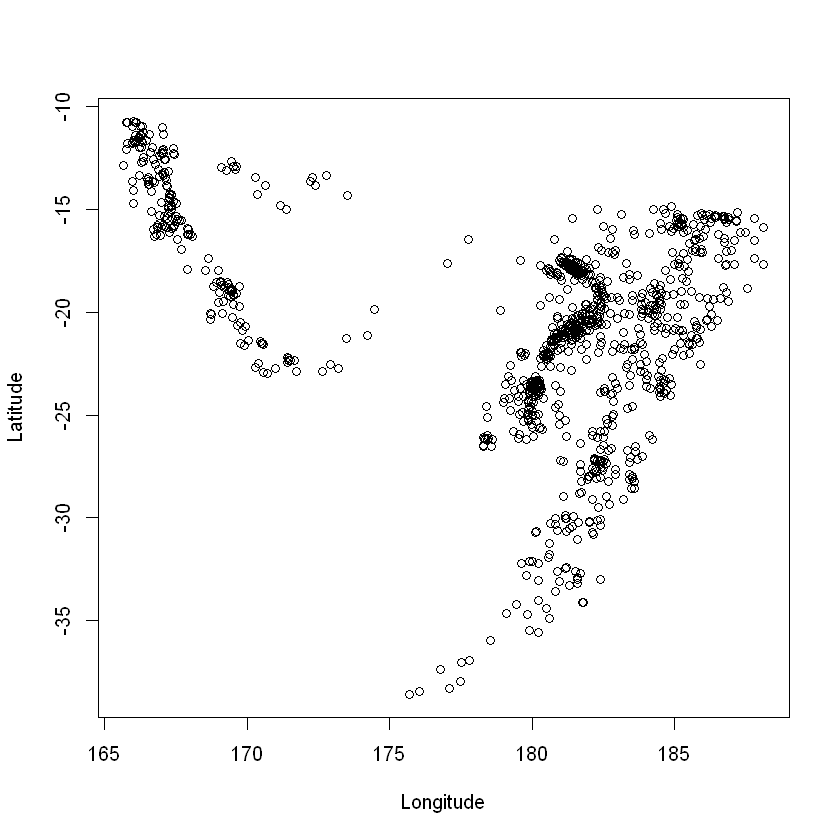

In [4]:
plot(quakes$long,quakes$lat,xlab="Longitude",ylab="Latitude")

## 参数和统计量

+ 总体是个体的集合
+ 参数是总体的特征
+ 统计量：根据样本的估计量

## 集中趋势：均值mean()，中位数median()，众数

In [9]:
xdata <- c(2,4.4,3,3,2,2.2,2,4)

mean(xdata)
median(xdata)

[1] 2.825

[1] 2.6

用table求众数

In [13]:
table(xdata)

xdata
  2 2.2   3   4 4.4 
  3   1   2   1   1 

In [21]:
max(table(xdata))

[1] 3

In [46]:
xtab=table(xdata)
zhong = xtab[xtab==max(xtab)]

2 
3

In [47]:
a=attributes(zhong)
a

$names
[1] "2"

In [48]:
as.numeric(a)

[1] 2

忽略缺失值

In [10]:
mean(c(1,4,NA),na.rm=TRUE)
mean(c(1,4,NaN),na.rm=TRUE)

[1] 2.5

[1] 2.5

## 计数，百分比和比例

In [49]:
table(chickwts$feed)


   casein horsebean   linseed  meatmeal   soybean sunflower 
       12        10        12        11        14        12 

In [50]:
table(chickwts$feed)/nrow(chickwts)


   casein horsebean   linseed  meatmeal   soybean sunflower 
0.1690141 0.1408451 0.1690141 0.1549296 0.1971831 0.1690141 

In [51]:
sum(chickwts$feed=="soybean")/nrow(chickwts)

[1] 0.1971831

In [55]:
mean(chickwts$feed=="soybean")

[1] 0.1971831

In [56]:
chickwts$feed

[1] horsebean horsebean horsebean horsebean horsebean horsebean horsebean
 [8] horsebean horsebean horsebean linseed   linseed   linseed   linseed  
[15] linseed   linseed   linseed   linseed   linseed   linseed   linseed  
[22] linseed   soybean   soybean   soybean   soybean   soybean   soybean  
[29] soybean   soybean   soybean   soybean   soybean   soybean   soybean  
[36] soybean   sunflower sunflower sunflower sunflower sunflower sunflower
[43] sunflower sunflower sunflower sunflower sunflower sunflower meatmeal 
[50] meatmeal  meatmeal  meatmeal  meatmeal  meatmeal  meatmeal  meatmeal 
[57] meatmeal  meatmeal  meatmeal  casein    casein    casein    casein   
[64] casein    casein    casein    casein    casein    casein    casein   
[71] casein   
Levels: casein horsebean linseed meatmeal soybean sunflower

In [ ]:
mean(chickwts$feed=="soybean"|chickwts$feed=="horsebean")

#

tapply(chickwts$weight,INDEX=chickwts$feed,FUN=function(x) length(x)/nrow(chickwts))

#

round(table(chickwts$feed)/nrow(chickwts),digits=3)

#

round(mean(chickwts$feed=="soybean")*100,1)

## 四分位数，百分位数和五分位数

In [1]:
xdata <- c(2,4.4,3,3,2,2.2,2,4)
quantile(xdata,prob=0.8)

80% 
3.6

In [58]:
quantile(xdata,prob=c(0,0.25,0.5,0.75,1))

0%  25%  50%  75% 100% 
2.00 2.00 2.60 3.25 4.40

In [3]:
as.numeric(quantile(xdata,0.75))

[1] 3.25

In [59]:
summary(quakes$mag[quakes$depth<400])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.00    4.40    4.60    4.67    4.90    6.40 

## 离散程度：方差var，标准差sd和四分位差函数IQR

IQR是上四分位数到下四分位数的距离

In [60]:
xdata <- c(2,4.4,3,3,2,2.2,2,4)
ydata <- c(1,4.4,1,3,2,2.2,2,7)

var(xdata)
sd(xdata)
IQR(xdata)

[1] 0.9078571

[1] 0.9528154

[1] 1.25

## 协方差cov和相关系数cor

In [66]:
xdata <- c(2,4.4,3,3,2,2.2,2,4)
ydata <- c(1,4.4,1,3,2,2.2,2,7)
cov(xdata,ydata)
cor(xdata,ydata)

[1] 1.479286

[1] 0.7713962

In [69]:
cov(quakes$mag,quakes$stations)

cor(quakes$mag,quakes$stations)

[1] 7.508181

[1] 0.8511824

# 可视化

## 条形图

各种气缸的分类数

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


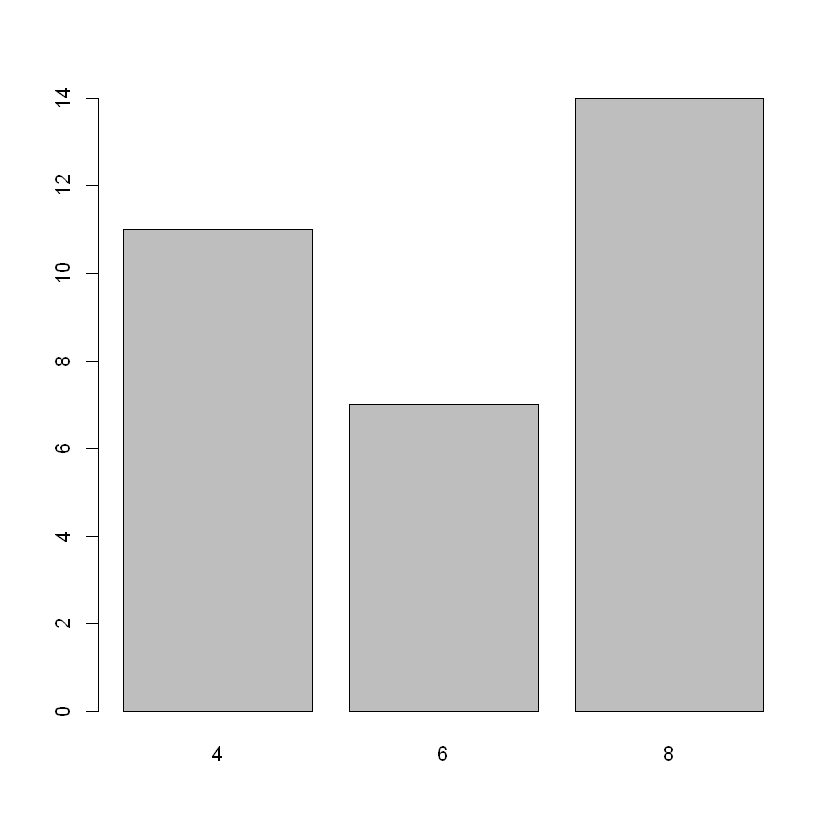

In [1]:
mtcars[1:5,]
barplot(table(mtcars$cyl))

In [2]:
table(mtcars$cyl[mtcars$am==0])
table(mtcars$cyl[mtcars$am==1])

#

cyl.freq.matrix <- table(mtcars$am,mtcars$cyl)
cyl.freq.matrix


 4  6  8 
 3  4 12 


4 6 8 
8 3 2 

   
     4  6  8
  0  3  4 12
  1  8  3  2

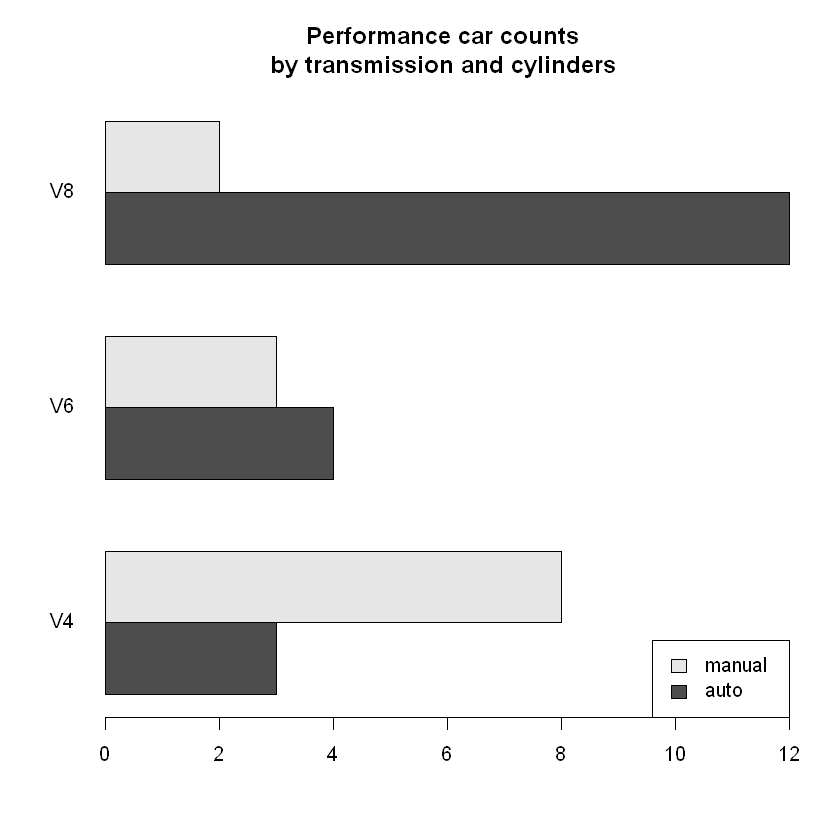

In [6]:
barplot(cyl.freq.matrix,beside=TRUE,horiz=TRUE,las=1,main="Performance car counts\nby transmission and cylinders",names.arg=c("V4","V6","V8"),legend.text=c("auto","manual"),args.legend=list(x="bottomright"))

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

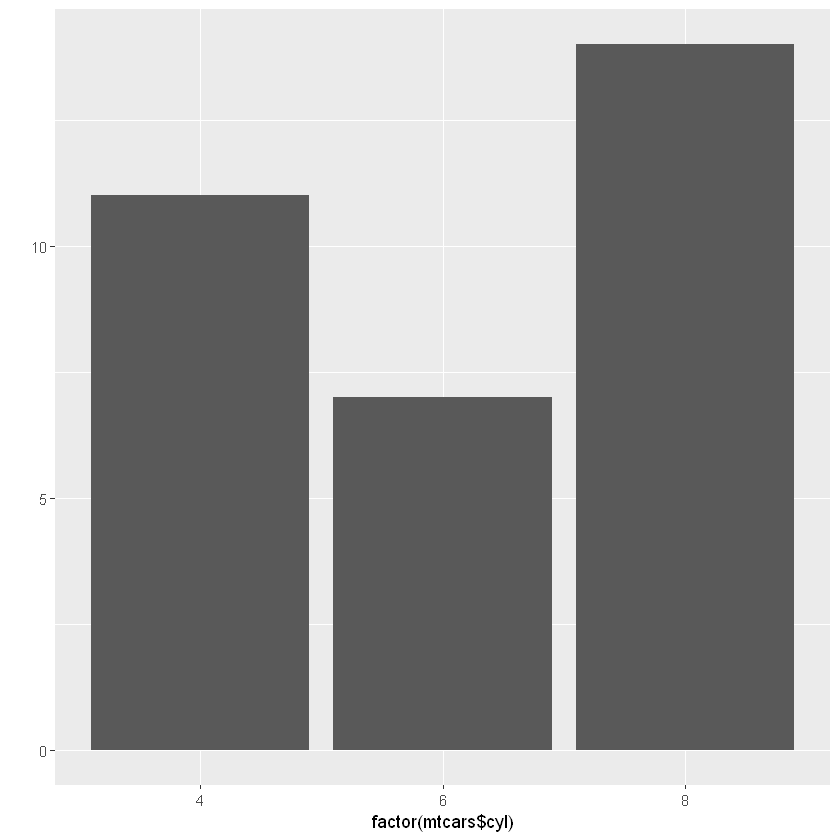

In [7]:
library("ggplot2")
qplot(factor(mtcars$cyl),geom="bar")

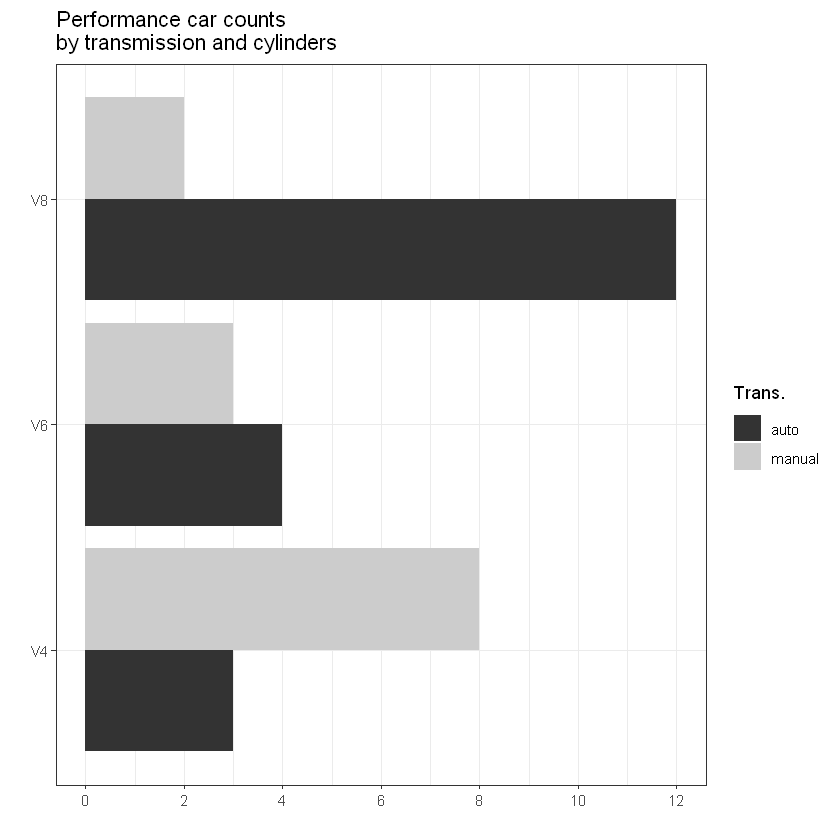

In [8]:
qplot(factor(mtcars$cyl),geom="blank",fill=factor(mtcars$am),xlab="",ylab="",main="Performance car counts\nby transmission and cylinders") + geom_bar(position="dodge") + scale_x_discrete(labels=c("V4","V6","V8")) + scale_y_continuous(breaks=seq(0,12,2)) + scale_fill_grey(name="Trans.",labels=c("auto","manual"))  + theme_bw() + coord_flip()

In [10]:
install.packages("stringr")

library("stringr")

install.packages("installr")

library(installr)

updateR()

Warning message:
"package 'stringr' is in use and will not be installed"Warning message:
"package 'installr' is in use and will not be installed"

ERROR: Error in winDialog(type = "ok", message = message_text): winDialog() cannot be used non-interactively


## 饼图

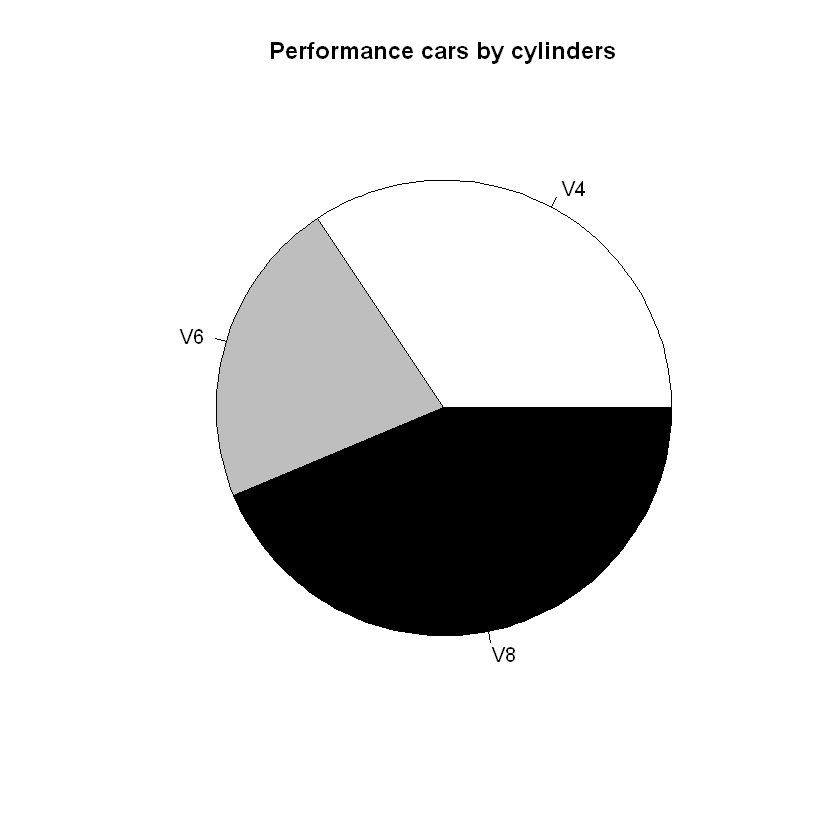

In [11]:
pie(table(mtcars$cyl),labels=c("V4","V6","V8"),col=c("white","gray","black"),main="Performance cars by cylinders")

## 直方图

[1] 110 110  93 110 175 105 245  62  95 123 123 180 180 180 205 215 230  66  52
[20]  65  97 150 150 245 175  66  91 113 264 175 335 109

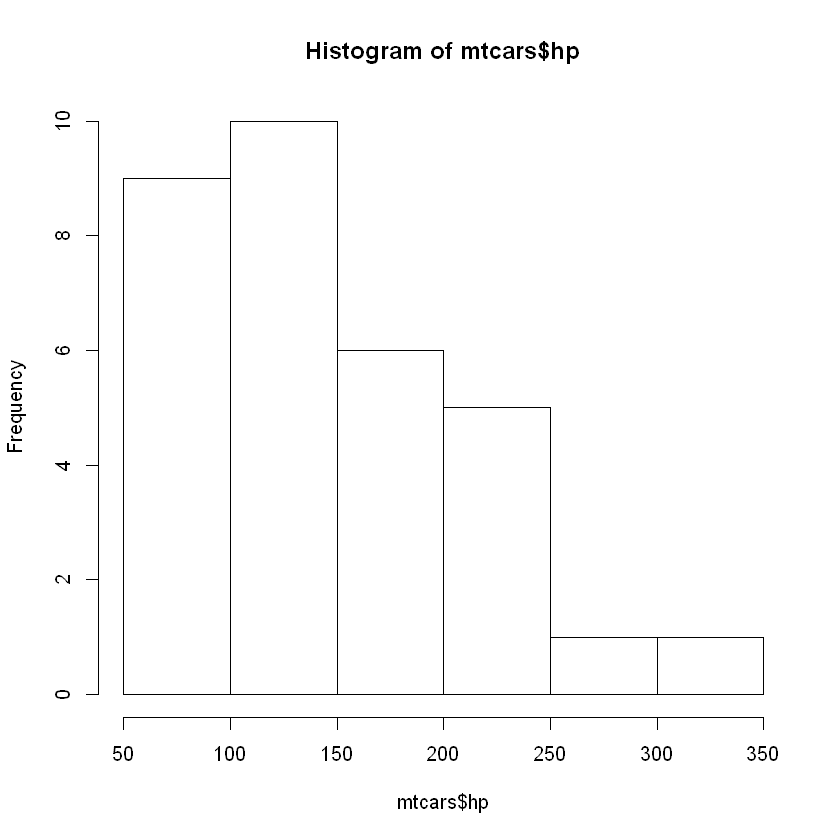

In [12]:
mtcars$hp
hist(mtcars$hp)

组间距由breaks参数控制

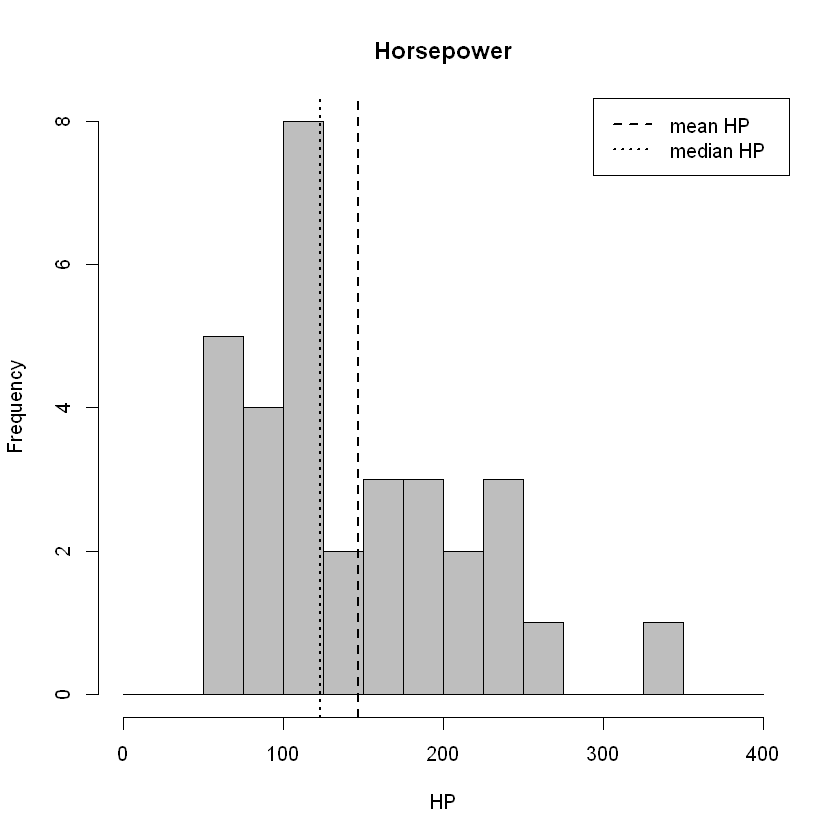

In [13]:
hist(mtcars$hp,breaks=seq(0,400,25),col="gray",main="Horsepower",xlab="HP")
abline(v=c(mean(mtcars$hp),median(mtcars$hp)),lty=c(2,3),lwd=2)
legend("topright",legend=c("mean HP","median HP"),lty=c(2,3),lwd=2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


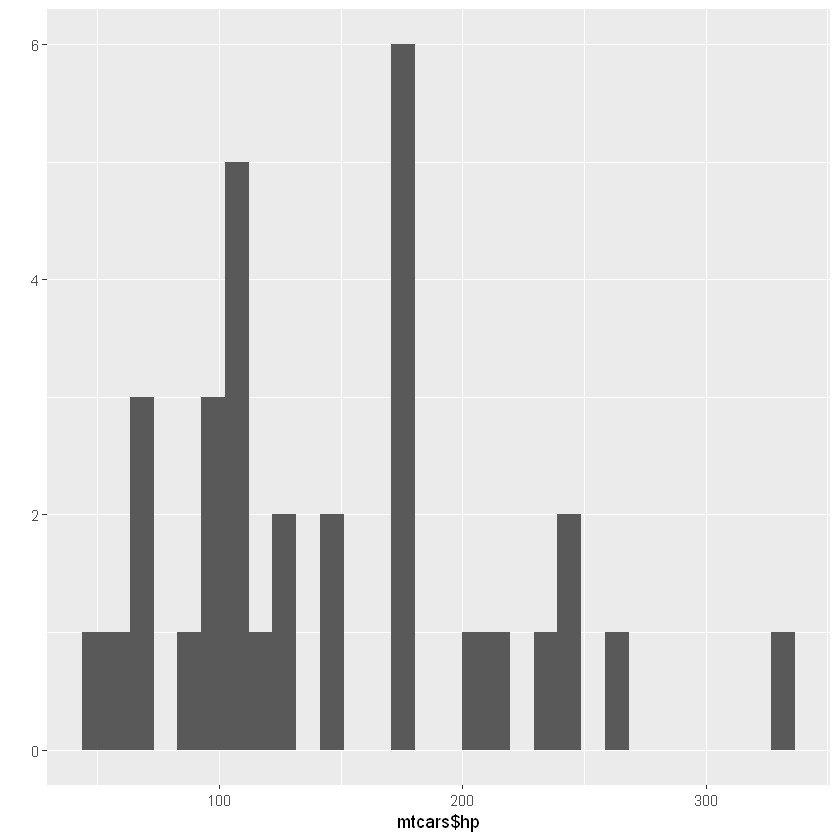

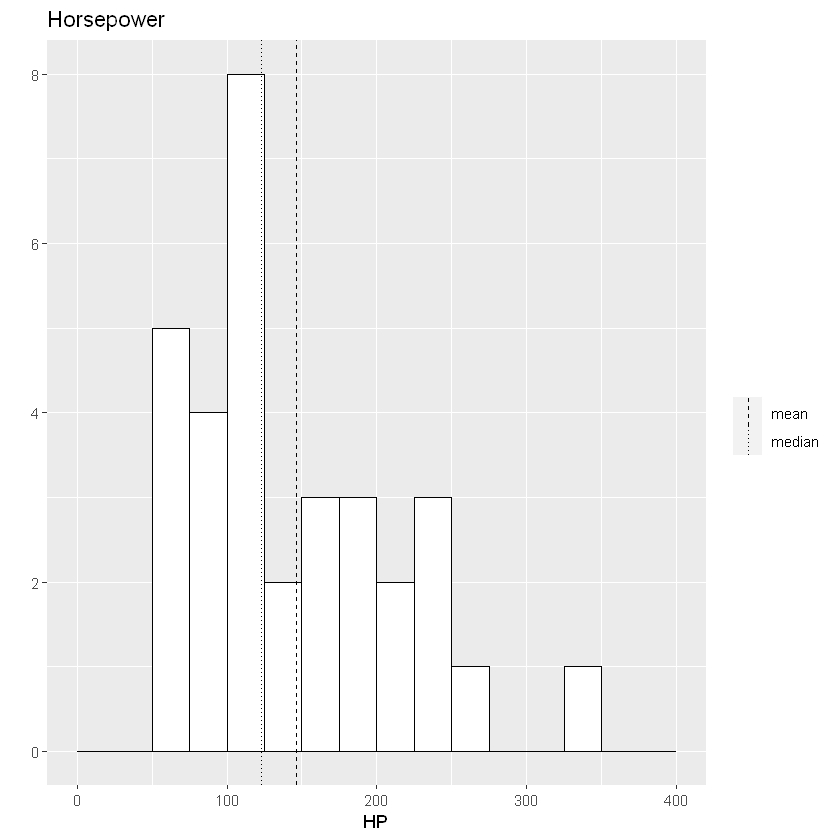

In [14]:
library("ggplot2")
qplot(mtcars$hp)

qplot(mtcars$hp,geom="blank",main="Horsepower",xlab="HP") + geom_histogram(color="black",fill="white",breaks=seq(0,400,25),closed="right") + geom_vline(mapping=aes(xintercept=c(mean(mtcars$hp),median(mtcars$hp)),linetype=factor(c("mean","median"))),show.legend=TRUE) + scale_linetype_manual(values=c(2,3)) + labs(linetype="")

## 核密度图

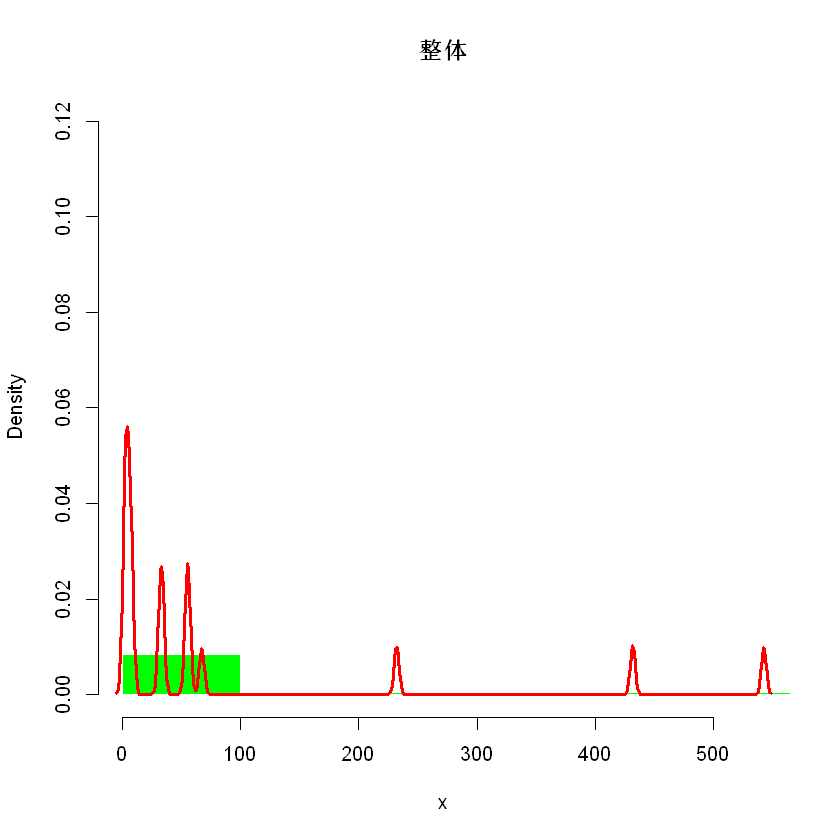

In [9]:
x = c(1,2,3,4,5,6,67,8,2,432,34,543,55,232,32,32,56,54,7)
hist(x,xlim=c(min(x),max(x)),ylim = c(0,0.12),probability = T,col = 'green',main="整体",border="white")  # probability T代表频率，F代表频数
lines(density(x,bw=2),col="red",lwd=3)   # density是核密度图，bw=0.001：核密度曲线的平滑度。数越大，越平滑，border=‘white’：柱子边界白色

# ggplot2绘图

## 基本使用

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

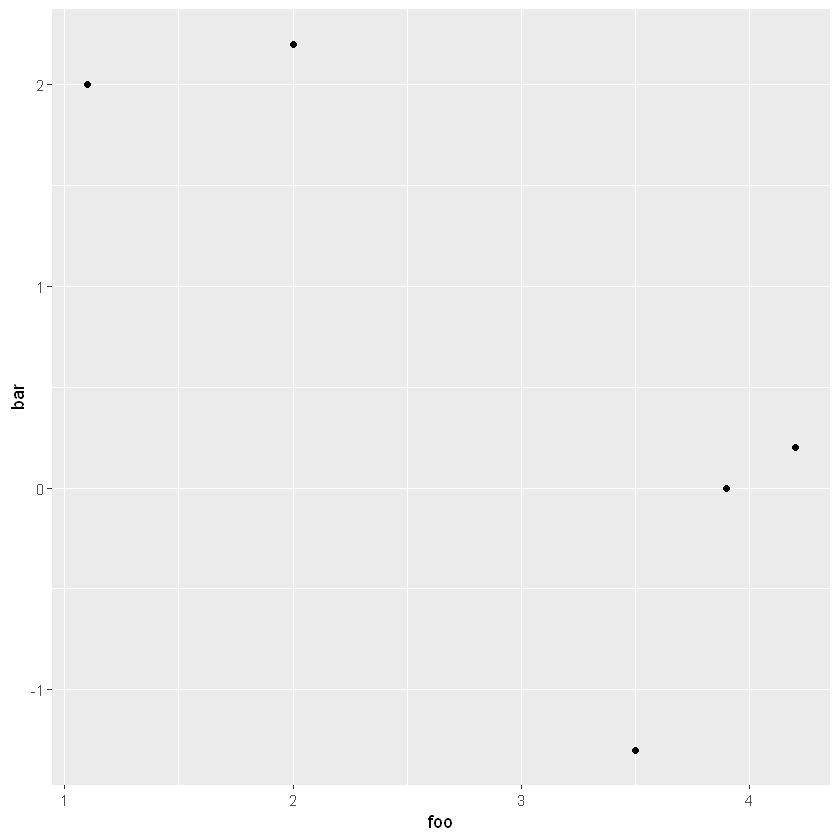

In [4]:
library(ggplot2)
foo <- c(1.1,2,3.5,3.9,4.2)
bar <- c(2,2.2,-1.3,0,0.2)
qplot(foo,bar)

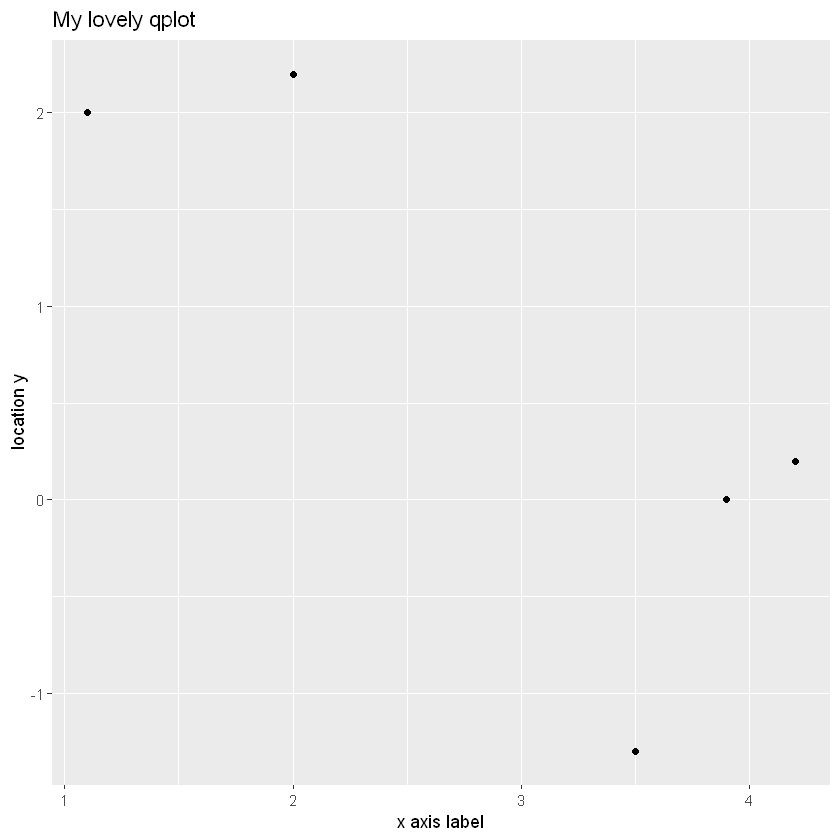

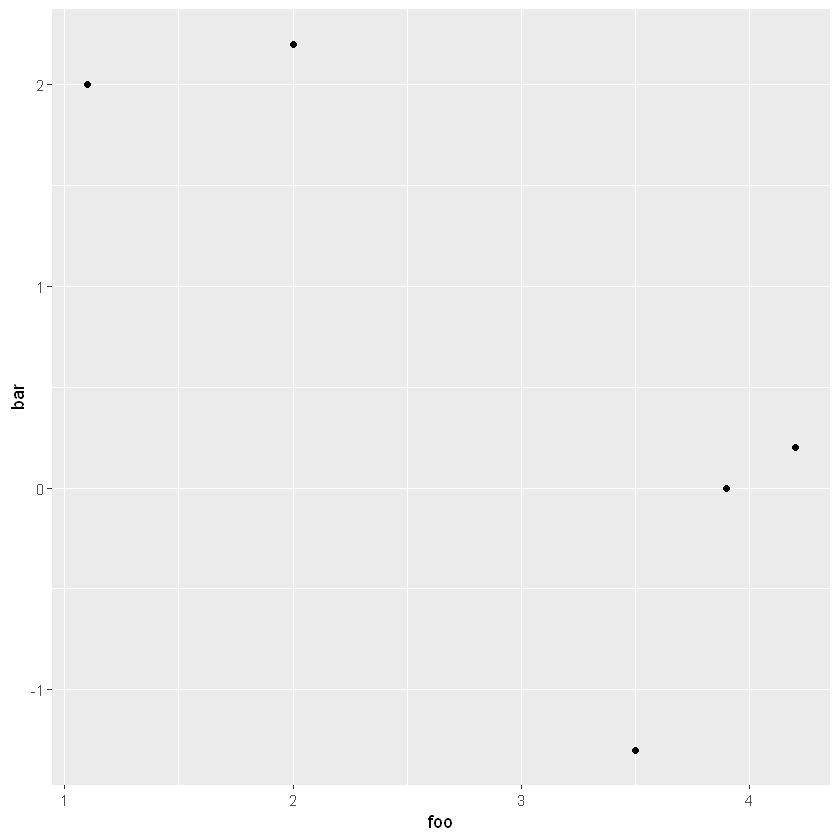

In [6]:
qplot(foo,bar,main="My lovely qplot",xlab="x axis label",ylab="location y")

qux <- qplot(foo,bar)
qux

## 用geoms设置外观常量

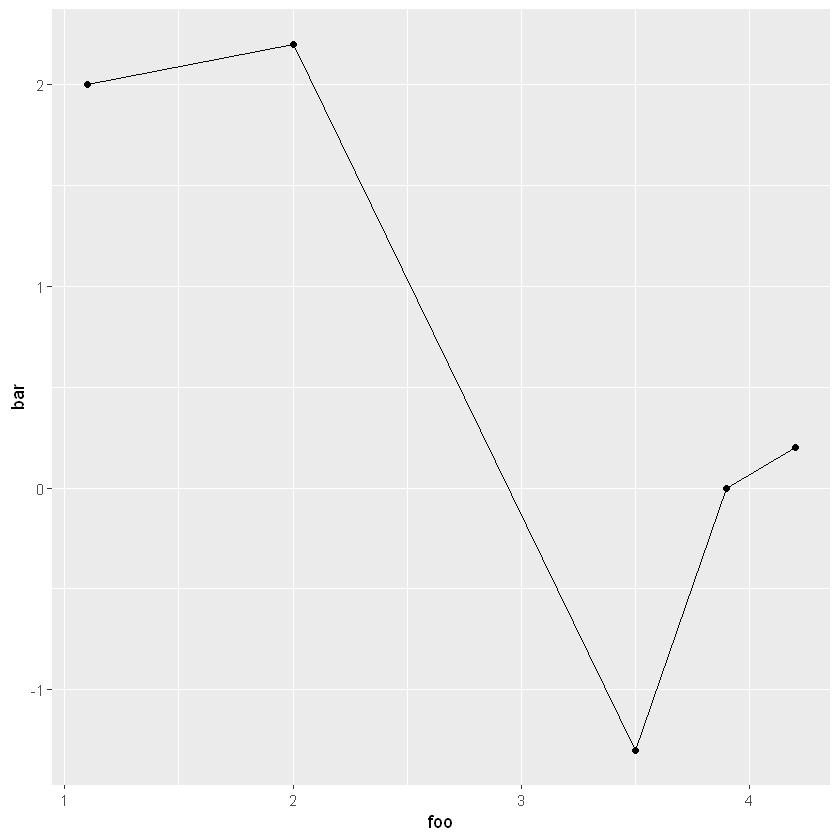

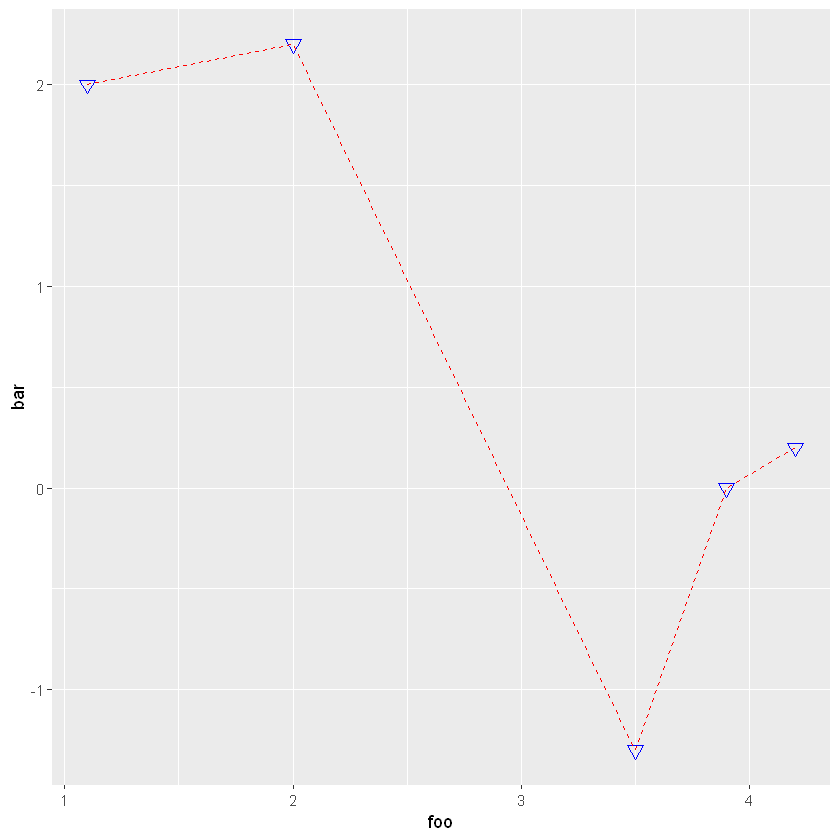

In [9]:
qplot(foo,bar,geom="blank") + geom_point() + geom_line()

qplot(foo,bar,geom="blank") + geom_point(size=3,shape=6,color="blue") + geom_line(color="red",linetype=2)

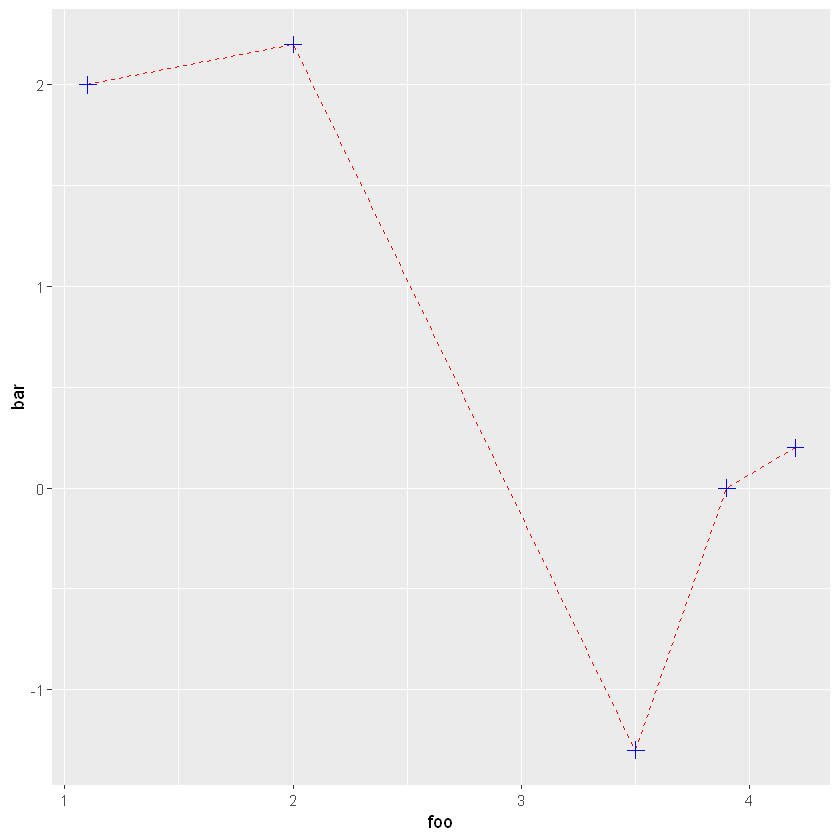

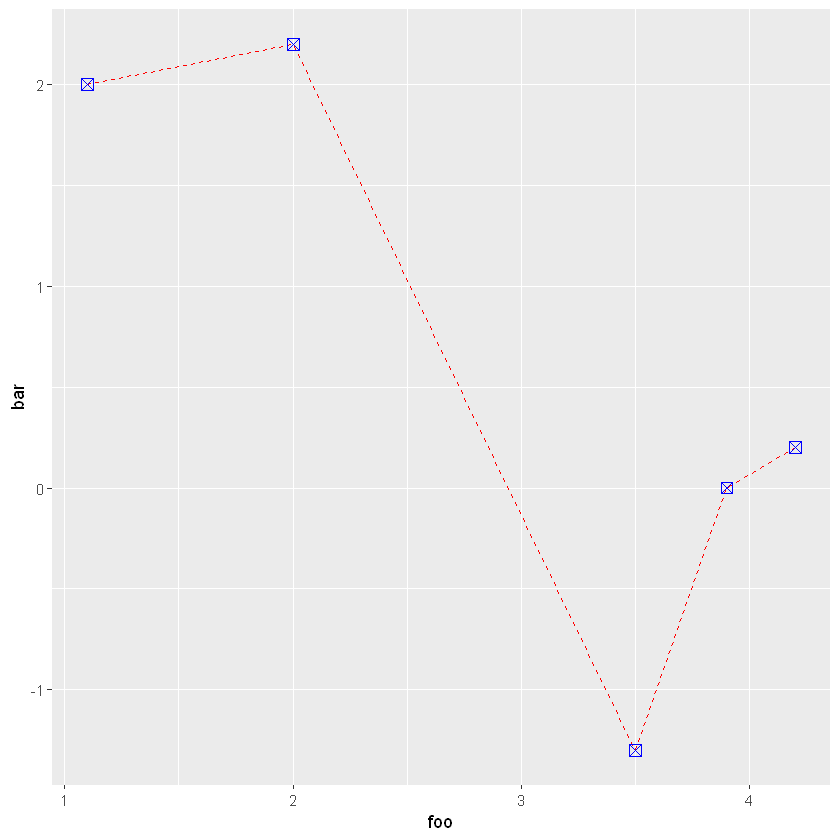

In [10]:
myqplot <- qplot(foo,bar,geom="blank") + geom_line(color="red",linetype=2)
myqplot + geom_point(size=3,shape=3,color="blue")
myqplot + geom_point(size=3,shape=7,color="blue")

## geoms的美学映射

[1] standard  standard  standard  standard  sweet     sweet     too_big  
 [8] too_big   sweet     too_small too_small too_small sweet     too_big  
[15] too_big   standard  too_small too_small standard  too_big  
Levels: standard sweet too_big too_small

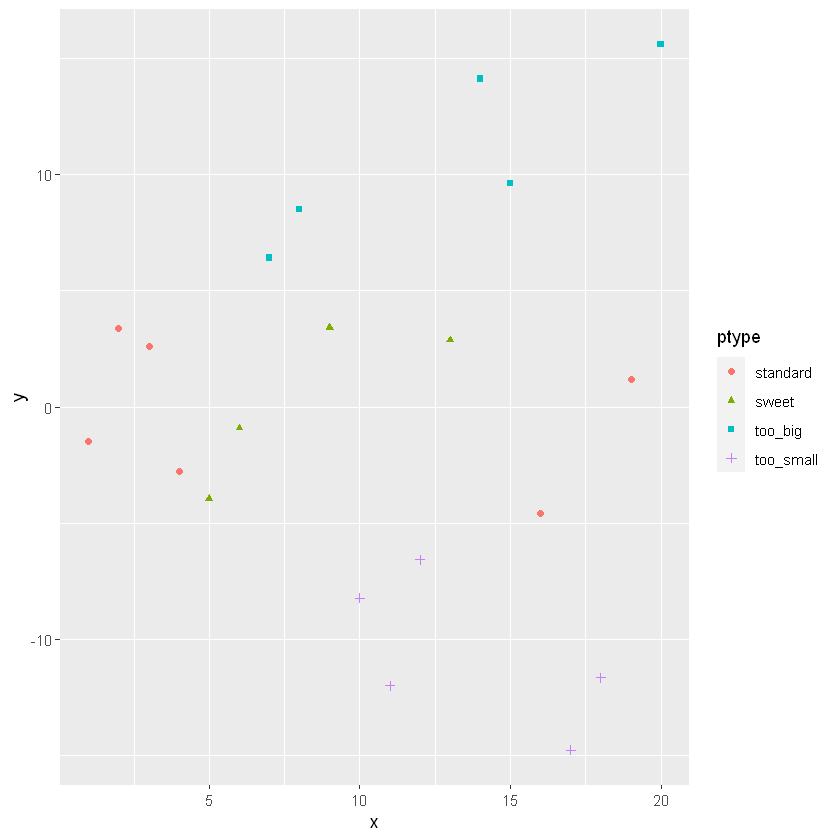

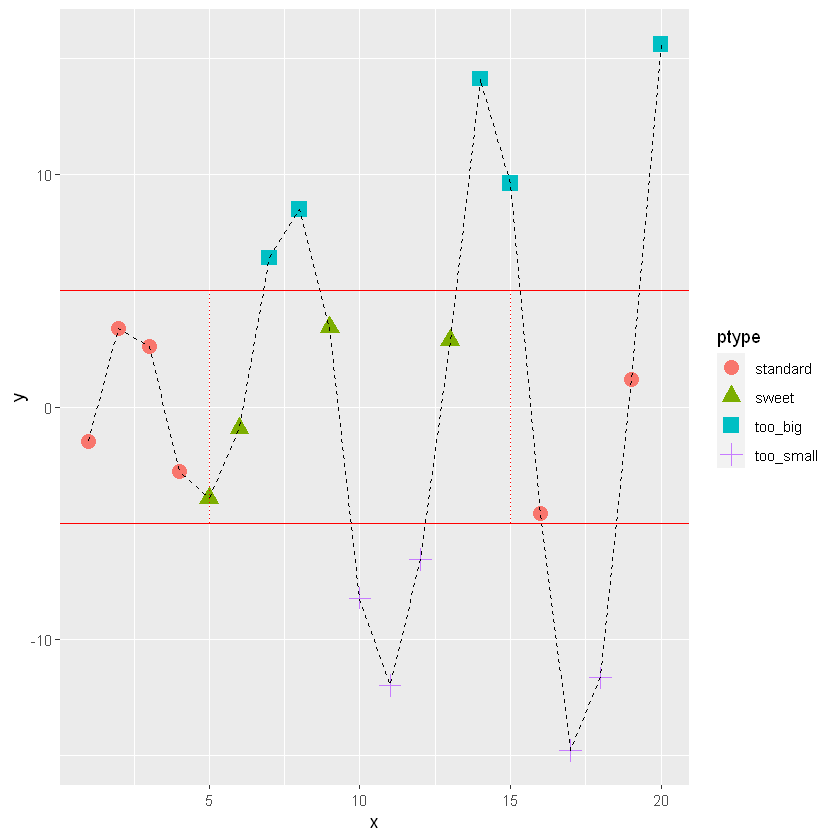

In [11]:
x <- 1:20
y <- c(-1.49,3.37,2.59,-2.78,-3.94,-0.92,6.43,8.51,3.41,-8.23,-12.01,-6.58,2.87,14.12,9.63,-4.58,-14.78,-11.67,1.17,15.62)

#

ptype <- rep(NA,length(x=x))
ptype[y>=5] <- "too_big"
ptype[y<=-5] <- "too_small"
ptype[(x>=5&x<=15)&(y>-5&y<5)] <- "sweet"
ptype[(x<5|x>15)&(y>-5&y<5)] <- "standard"
ptype <- factor(x=ptype)
ptype

#

qplot(x,y,color=ptype,shape=ptype)

#

qplot(x,y,color=ptype,shape=ptype) + geom_point(size=4) + geom_line(mapping=aes(group=1),color="black",lty=2) + geom_hline(mapping=aes(yintercept=c(-5,5)),color="red") + geom_segment(mapping=aes(x=5,y=-5,xend=5,yend=5),color="red",lty=3) + geom_segment(mapping=aes(x=15,y=-5,xend=15,yend=5),color="red",lty=3)


# 常见概率分布

R中与xxx分布有关的函数包括：

+ dxxx(x)， 即xxx分布的分布密度函数(PDF)或概率函数(PMF)p(x)。（某一点的概率）

+ pxxx(q)， 即xxx分布的分布函数(CDF)$F(q)=P(X \leq q)$。（累计概率）

+ qxxx(p)， 即xxx分布的分位数函数q(p), $p \in (0,1)$， 对连续型分布，$q(p) = F^{-1}(p)$， 即F(x)=p的解x。

+ rxxx(n)， 即xxx的随机数函数，可以生成n个xxx的随机数。

dxxx(x)函数可以加选项log=TRUE， 用来计算$\ln p(x)$， 这在计算对数似然函数时有用， 比log(dxxx(x))更精确。

pxxx(q)可以加选项lower.tail=FALSE， 变成计算$P(X>q) = 1 - F(q)$。

qxxx(p)可以加选项lower.tail=TRUE， 表示求P(X>x)=p的解x； 可以加选项log.p=TRUE， 表示输入的p实际是$\ln p$。

这些函数都可以带有自己的分布参数， 有些分布参数有缺省值， 比如正态分布的缺省参数值为零均值单位标准差。

具体的分布类型可以在R命令行用?Distributions查看列表。 常用的分布密度有：

+ 离散分布有dbinom二项分布, dpois泊松分布， dgeom几何分布， dnbinom负二项分布， dmultinom多项分布， dhyper超几何分布。
+ 连续分布有 dunif均匀分布， dnorm正态分布， dchisq卡方分布， dt t分布(包括非中心t)， df F分布， dexp指数分布， dweibull 威布尔分布， dgamma 伽马分布， dbeta 贝塔分布， dlnorm 对数正态分布， dcauchy 柯西分布, dlogis 逻辑斯谛分布。

## 离散型分布

### 伯努利分布

### 二项分布(binom)

dbinom：PDF函数，某一点的值

In [1]:
dbinom(x=5,size=8,prob=1/6)

# 0-8所有的概率
X.prob <- dbinom(x=0:8,size=8,prob=1/6)
X.prob

# 概率和为1
sum(X.prob)

# 保留三位小数
round(X.prob,3)

[1] 0.004167619

[1] 2.325680e-01 3.721089e-01 2.604762e-01 1.041905e-01 2.604762e-02
[6] 4.167619e-03 4.167619e-04 2.381497e-05 5.953742e-07

[1] 1

[1] 0.233 0.372 0.260 0.104 0.026 0.004 0.000 0.000 0.000

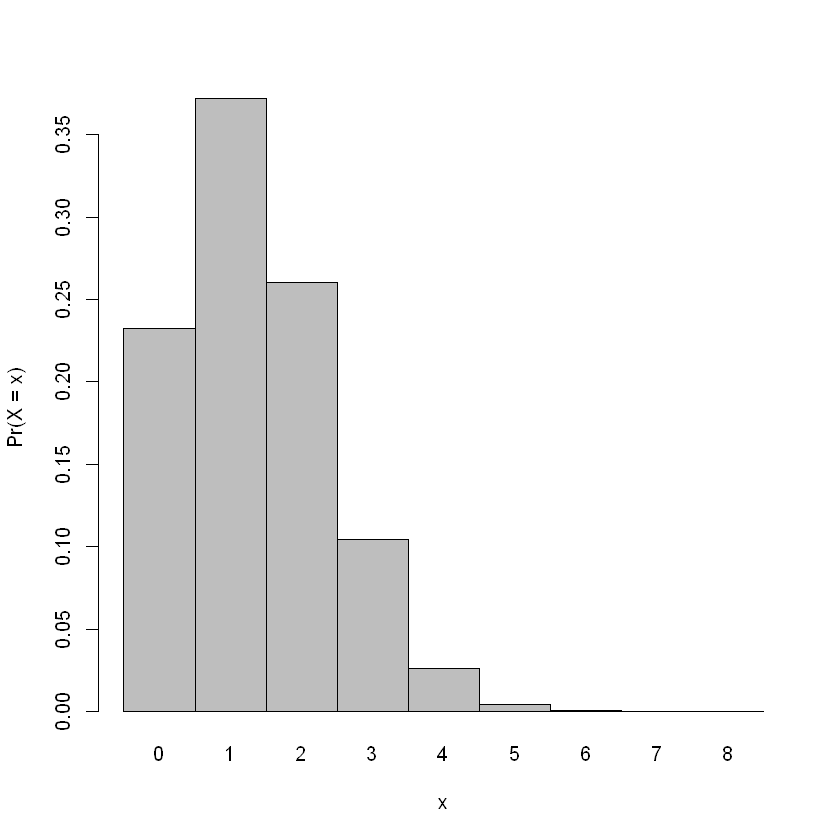

In [8]:
barplot(X.prob,names.arg=0:8,space=0,xlab="x",ylab="Pr(X = x)")

平均值$\mu=np$

方差$\sigma^2=np(1-p)$

$pbinom$函数：累积概率

In [10]:
sum(dbinom(x=0:3,size=8,prob=1/6))
pbinom(q=3,size=8,prob=1/6)      # q是变量值

[1] 0.9693436

[1] 0.9693436

$rbinom$函数：产生服从二项分布的随机数

In [18]:
rbinom(n=1,size=8,prob=1/6)  # n是产生的数量
rbinom(n=1,size=8,prob=1/6)
rbinom(n=1,size=8,prob=1/6)
rbinom(n=3,size=8,prob=1/6)

[1] 2

[1] 1

[1] 1

[1] 2 1 2

### 泊松分布(pois)

$P(X=k)=\frac{\lambda^k}{k!}e^{-\lambda}   \lambda>0 , k=0,1,2,...,n$

泊松分布的均值和方差均是$\lambda$

lambda即是$\lambda$

In [20]:
dpois(x=3,lambda=3.22)
dpois(x=0,lambda=3.22)
round(dpois(0:10,3.22),3)

[1] 0.2223249

[1] 0.03995506

[1] 0.040 0.129 0.207 0.222 0.179 0.115 0.062 0.028 0.011 0.004 0.001

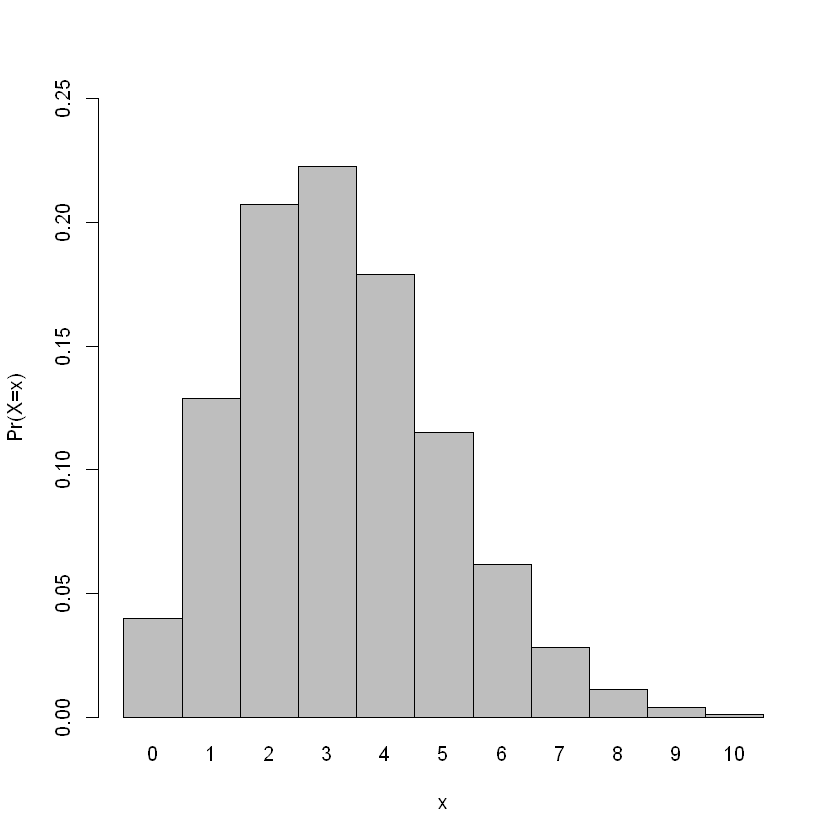

In [21]:
barplot(dpois(x=0:10,lambda=3.22),ylim=c(0,0.25),space=0,names.arg=0:10,ylab="Pr(X=x)",xlab="x")

In [22]:
# 累积概率
ppois(q=2,lambda=3.22)
# barplot(ppois(q=0:10,lambda=3.22),ylim=0:1,space=0,names.arg=0:10,ylab="Pr(X<=x)",xlab="x")

[1] 0.3757454

## 连续型分布

### 均匀分布(unif)

### 正态分布

$X$~$N(\mu,\delta^2)$

$f(x)=\frac{1}{\sqrt{2\pi}\delta}e^{-\frac{(x-\mu)^2}{2\delta^2}}$

$dnorm$函数
默认生成标准正态分布

In [24]:
xvals <- seq(-4,4,length=10)
fx <- dnorm(xvals,mean=0,sd=1)
fx

[1] 0.0001338302 0.0031560163 0.0337736510 0.1640100747 0.3614238299
 [6] 0.3614238299 0.1640100747 0.0337736510 0.0031560163 0.0001338302

$pnorm函数$

In [27]:
mu <- -3.42
sigma <- 0.2
mu.minus.1sig <- mu-sigma
mu.minus.1sig
mu.plus.1sig <- mu+sigma
mu.plus.1sig
pnorm(q=mu.plus.1sig,mean=mu,sd=sigma) - pnorm(q=mu.minus.1sig,mean=mu,sd=sigma)

[1] -3.62

[1] -3.22

[1] 0.6826895

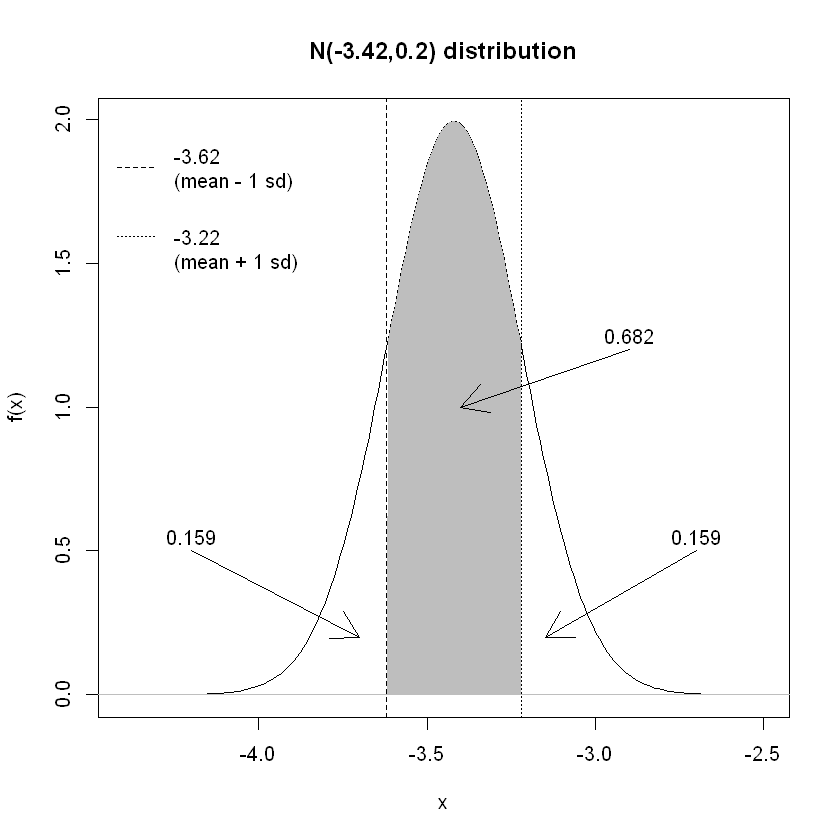

In [29]:
xvals <- seq(-5,-2,length=300)
fx <- dnorm(xvals,mean=mu,sd=sigma)
plot(xvals,fx,type="l",xlim=c(-4.4,-2.5),main="N(-3.42,0.2) distribution",xlab="x",ylab="f(x)")
abline(h=0,col="gray")
abline(v=c(mu.plus.1sig,mu.minus.1sig),lty=3:2)
legend("topleft",legend=c("-3.62\n(mean - 1 sd)","\n-3.22\n(mean + 1 sd)"),lty=2:3,bty="n")
xvals.sub <- xvals[xvals>=mu.minus.1sig & xvals<=mu.plus.1sig]
fx.sub <- fx[xvals>=mu.minus.1sig & xvals<=mu.plus.1sig]

polygon(rbind(c(mu.minus.1sig,0),cbind(xvals.sub,fx.sub),c(mu.plus.1sig,0)),border=NA,col="gray")

arrows(c(-4.2,-2.7,-2.9),c(0.5,0.5,1.2),c(-3.7,-3.15,-3.4),c(0.2,0.2,1))
text(c(-4.2,-2.7,-2.9),c(0.5,0.5,1.2)+0.05,labels=c("0.159","0.159","0.682"))

### 学生t分布

通过自由度来选择t分布，自由度通常与样本大小直接相关

In [15]:
qt(1-0.05,df=1)
qt(1-0.05,df=6)
qt(1-0.05,df=20)

[1] 6.313752

[1] 1.94318

[1] 1.724718

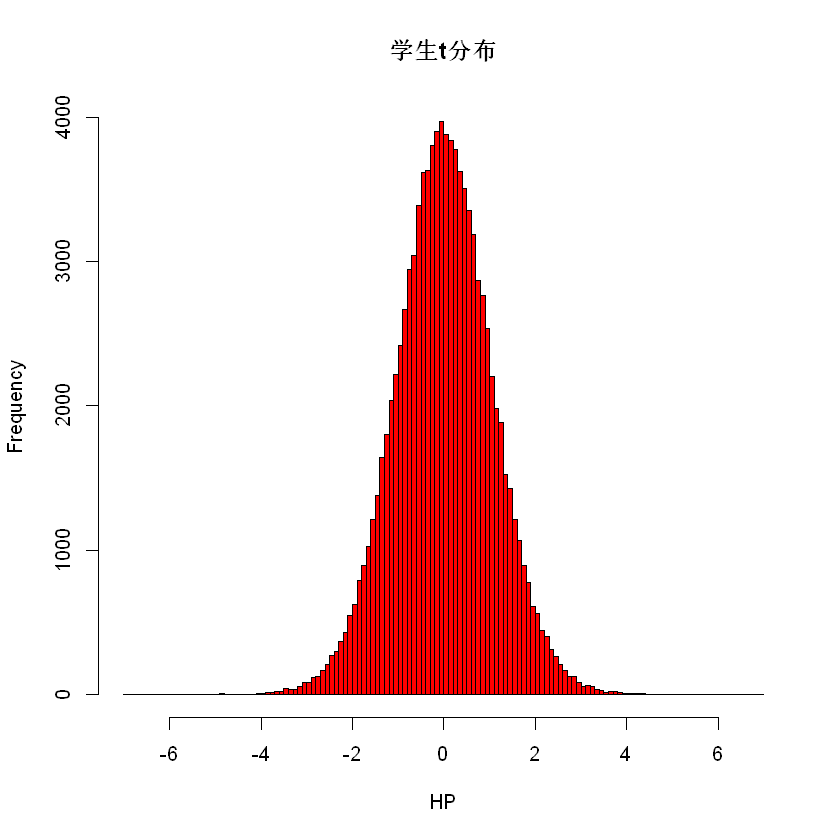

In [39]:
hist(rt(100000,df = 20),breaks=seq(-7,7,0.1),col="red",main="学生t分布",xlab="HP")

### 指数分布(exp)

密度函数$f(x)=\lambda e^{-\lambda x}$
平均值$\mu=\frac{1}{\lambda}$  方差$\delta^2=\frac{1}{\lambda^2}$

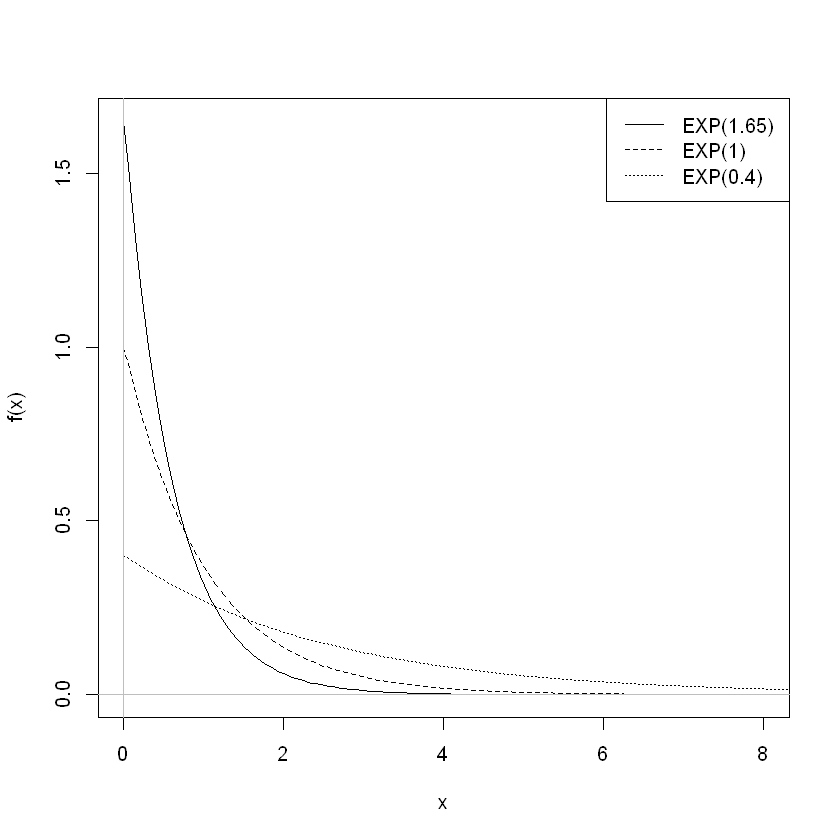

In [40]:
xvals <- seq(0,10,length=200)
plot(xvals,dexp(x=xvals,rate=1.65),xlim=c(0,8),ylim=c(0,1.65),type="l",xlab="x",ylab="f(x)")
lines(xvals,dexp(x=xvals,rate=1),lty=2)
lines(xvals,dexp(x=xvals,rate=0.4),lty=3)
abline(v=0,col="gray")
abline(h=0,col="gray")
legend("topright",legend=c("EXP(1.65)","EXP(1)","EXP(0.4)"),lty=1:3)

### 韦伯分布

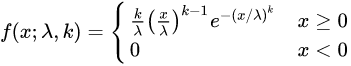
其中，x是随机变量，λ>0是比例参数（scale parameter），k>0是形状参数（shape parameter）。显然，它的累积分布函数是扩展的指数分布函数，而且，Weibull distribution与很多分布都有关系。如，当k=1，它是指数分布；k=2且时，是Rayleigh distribution（瑞利分布）。

In [10]:
library(MASS)
s = rweibull(1000,2,scale = 8)
tem<-fitdistr(s, densfun = "weibull",lower=c(1,1))   # lower代表最小的shape和scale

shape<-tem$estimate[1]
scale<-tem$estimate[2]
k<-ks.test(jitter(s),"pweibull",shape=shape,scale=scale)

# jitter(s),添加小的随机数作为噪声，防止点的重叠

k$p.value
shape
scale

[1] 0.9250175

shape 
1.967196

scale 
7.954814

### ks.test

Kolmogorov-Smirnov是比较一个频率分布f(x)与理论分布g(x)或者两个观测值分布的检验方法。其原假设H0:两个数据分布一致或者数据符合理论分布。D=max| f(x)- g(x)|，当实际观测值D>D(n,α)则拒绝H0，否则则接受H0假设。

In [ ]:
library(MASS)
s = rweibull(1000,2,scale = 8)
tem<-fitdistr(s, densfun = "weibull",lower=c(1,1))   # lower代表最小的shape和scale

shape<-tem$estimate[1]
scale<-tem$estimate[2]
k<-ks.test(jitter(s),"pweibull",shape=shape,scale=scale)

# jitter(s),添加小的随机数作为噪声，防止点的重叠

k$p.value
shape
scale

# 统计检验

## 抽样分布

### 样本均值的分布

情况1：已知标准差
+ 若X本身是正态的，则X抽样分布的样本均值是正态分布，平均值为$\mu_x$，标准误差为$\frac{\delta_x}{\sqrt{n}}$($\delta$是总体的标准差)
+ 若X本身是非正态的，则X抽样分布的样本均值近似服从正态分布，平均值为$\mu_x$，标准误差为$\frac{s_x}{\sqrt{n}}$($s$是抽样分布的标准差)<br>


情况2：标准差未知
+ X的抽样分布的标准化值服从自由度v=n-1的t分布，使用标准误差为$\frac{s_x}{\sqrt{n}}$进行了标准化

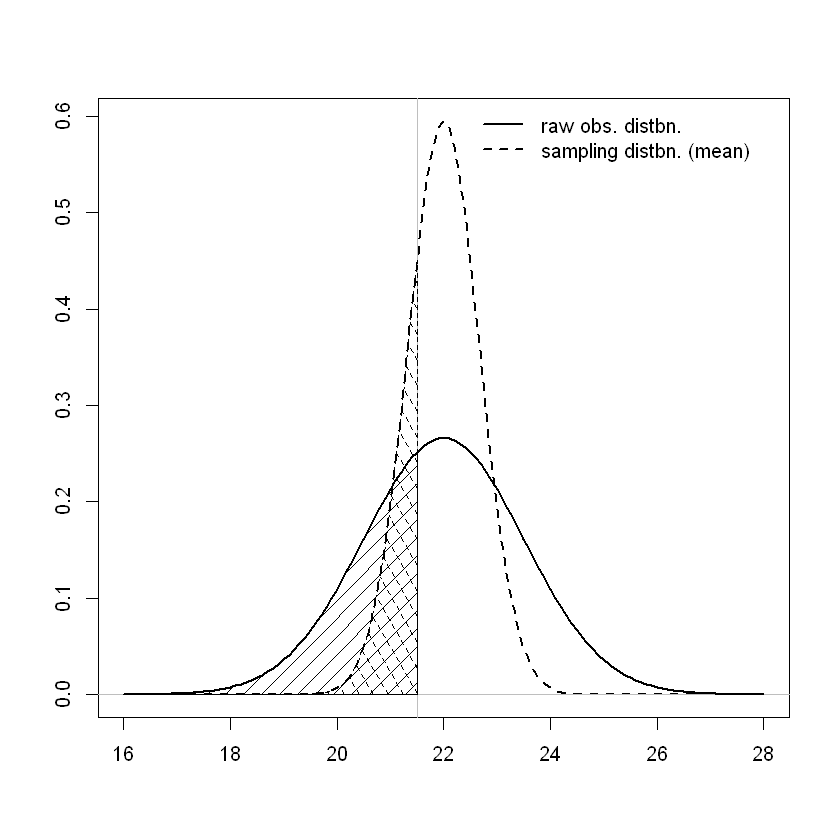

In [19]:
xvals <- seq(16,28,by=0.1)
fx.samp <- dnorm(xvals,22,1.5/sqrt(5))
plot(xvals,fx.samp,type="l",lty=2,lwd=2,xlab="",ylab="")
abline(h=0,col="gray")
fx <- dnorm(xvals,22,1.5)
lines(xvals,fx,lwd=2)
legend("topright",legend=c("raw obs. distbn.","sampling distbn. (mean)"),lty=1:2,lwd=c(2,2),bty="n") # this plot is continued below

abline(v=21.5,col="gray")
xvals.sub <- xvals[xvals<=21.5]
fx.sub <- fx[xvals<=21.5]
fx.samp.sub <- fx.samp[xvals<=21.5]
polygon(cbind(c(21.5,xvals.sub),c(0,fx.sub)),density=10)
polygon(cbind(c(21.5,xvals.sub),c(0,fx.samp.sub)),density=10,angle=120,lty=2)

### 样本比例的分布

随机变量$\hat{P}$表示n次试验中成功比例的估计，每次试验结果是0或1。估计式是$\hat{p}=\frac{x}{n}$，其中x是n次试验成功的次数。$\pi$表示成功的比例。<br>
$\hat{P}$的抽样分布近似为正态分布，其平均值为$\pi$，标准误差为$\sqrt{\pi(1-\pi)/n}$
+ 当真实$\pi$未知时，用$\hat{p}$代替

## 置信区间（CI）

+ 置信区间CI是下限l和上限u限定的间隔
+ 置信水平：通常表示为百分比，用以构建$100*(1-\alpha)百分比置信区间$

### 平均值的置信区间

## 假设检验

In [1]:
dbinom(18,20,0.07) + dbinom(19,20,0.07) + dbinom(20,20,0.07)

[1] 2.69727e-19

In [3]:
sum(dbinom(c(18,19,20),20,0.07))

[1] 2.69727e-19